# Introduction to "Text Classification on movie's comments"
Here, We are going to classify movie reviews as positive or negative using the text of the review. This is an example of binary—or two-class—classification, an important and widely applicable kind of machine learning problem. We will use IMDB (Internet Movie Database) dataset that contains 50,000 comments.

@Made by Swastik Dasgaonkar for all

In [1]:
#Setup
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [2]:
#Get the IMDB dataset
train_data, test_data= tfds.load(name="imdb_reviews", split= ['train', 'test'], 
                                batch_size= -1, as_supervised=True )
train_examples, train_labels = tfds.as_numpy(train_data )
test_examples, test_labels = tfds.as_numpy(test_data )
#'as_numpy()' converts nested structure of tf.data.Dataset train_examples, train_labels = tfds.as_numpy(train_data )or tf.Tensor to NumPy arrays
#'tf.data.Dataset.get_single_element()' Returns the single element of the dataset as a nested structure of tensors

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRSNYHB/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRSNYHB/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRSNYHB/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [3]:
#Explore data
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 25000, test entries: 25000


In [4]:
train_examples[:10]

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

In [5]:
train_labels[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [6]:
#Build the model
#we will use model 'google/nnlm-en-dim50/2' as text embedding process. Why? answer below
#it helps  us to transfer learning and text preprocessing
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423195 , -0.0119017 ,  0.06337538,  0.06862972, -0.16776837,
        -0.10581174,  0.16865303, -0.04998824, -0.31148055,  0.07910346,
         0.15442263,  0.01488662,  0.03930153,  0.19772711, -0.12215476,
        -0.04120981, -0.2704109 , -0.21922152,  0.26517662, -0.80739075,
         0.25833532, -0.3100421 ,  0.28683215,  0.1943387 , -0.29036492,
         0.03862849, -0.7844411 , -0.0479324 ,  0.4110299 , -0.36388892,
        -0.58034706,  0.30269456,  0.3630897 , -0.15227164, -0.44391504,
         0.19462997,  0.19528408,  0.05666234,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201318 , -0.04418665, -0.08550783,
        -0.55847436, -0.23336391, -0.20782952, -0.03543064, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862679,  0.7753425 , -0.07667089,
        -0.15752277,  0.01872335, -0.08169781, -0.3521876 ,  0.4637341 ,
        -0.08492756,  0.07166859, -0.00670817,  0.12686075, -0.19326553,
 

In [7]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', #adam- Adaptive moment estimation
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [11]:
#Validation to tune our model
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [12]:
#Train the model
history = model.fit(partial_x_train, partial_y_train,
                    epochs=40, batch_size=512, validation_data=(x_val,y_val), verbose=1)

Epoch 1/40
30/30 [==============================] - 17s 536ms/step - loss: 0.6472 - accuracy: 0.6545 - val_loss: 0.5910 - val_accuracy: 0.7364
Epoch 2/40
30/30 [==============================] - 16s 531ms/step - loss: 0.5232 - accuracy: 0.7917 - val_loss: 0.4816 - val_accuracy: 0.8017
Epoch 3/40
30/30 [==============================] - 16s 525ms/step - loss: 0.3913 - accuracy: 0.8603 - val_loss: 0.3898 - val_accuracy: 0.8446
Epoch 4/40
30/30 [==============================] - 16s 528ms/step - loss: 0.2851 - accuracy: 0.9034 - val_loss: 0.3378 - val_accuracy: 0.8589
Epoch 5/40
30/30 [==============================] - 16s 528ms/step - loss: 0.2076 - accuracy: 0.9323 - val_loss: 0.3157 - val_accuracy: 0.8676
Epoch 6/40
30/30 [==============================] - 16s 530ms/step - loss: 0.1534 - accuracy: 0.9545 - val_loss: 0.3010 - val_accuracy: 0.8736
Epoch 7/40
30/30 [==============================] - 16s 529ms/step - loss: 0.1098 - accuracy: 0.9720 - val_loss: 0.3010 - val_accuracy: 0.8760

In [13]:
#Evaluate the model based on loss and accuracy
results= model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 40s 51ms/step - loss: 0.6103 - accuracy: 0.8461
[0.6102620363235474, 0.8460800051689148]


In [ ]:
#We achieve acuuracy of about 84.61%

In [14]:
history_dict = history.history #history object contains dictionary that happened during training
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

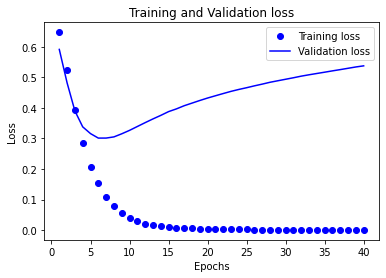

In [15]:
#Graphical representation of accuracy and loss over the time
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

# bo = blue dots
plt.plot(epochs, loss, 'bo', label='Training loss')
# b = blue line
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


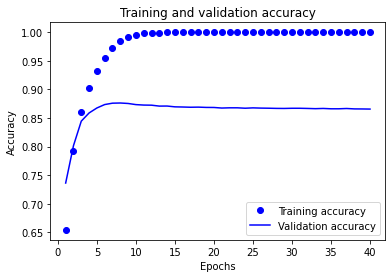

In [17]:
plt.clf() # clear figure

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
#model performs better on training data than validation data
#So it kind of overfitting the data...
#we can prevent overfitting by stopping training after 20 epochs or so.
#With more advanced approaches, the model should get closer to 95%